In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import sparse
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import preprocessing, model_selection
import time
import re
from datetime import datetime

import nltk
from nltk.tag import pos_tag
from nltk import word_tokenize
from nltk.corpus import stopwords


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data = pd.read_csv("../input/sample_submission.csv")
train = pd.read_json(open("../input/train.json", "r"))
test = pd.read_json(open("../input/test.json", "r"))
print 'train shape:',train.shape
print 'test shape:',test.shape

y_map = {'low': 2, 'medium': 1, 'high': 0}
target = train['interest_level'].apply(lambda x: y_map[x]).values

# ntrain = train.shape[0]

train shape: (49352, 15)
test shape: (74659, 14)


# Price

['sc_price']


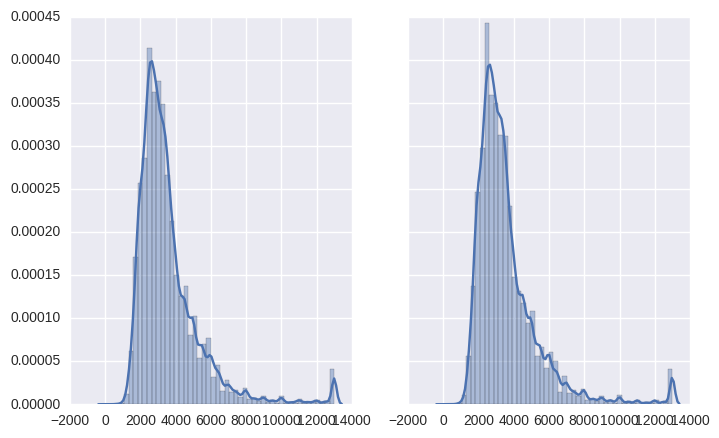

In [3]:
# standard price

tmp = pd.concat([train['price'],test['price']])
ulimit = np.percentile(tmp.values, 99)

train.loc[:,'sc_price'] = train['price'].values.reshape(-1, 1)
test.loc[:,'sc_price'] = test['price'].values.reshape(-1, 1)

train.loc[train['sc_price']>ulimit, ['sc_price']] = ulimit
test.loc[test['sc_price']>ulimit, ['sc_price']] = ulimit

# scaler = preprocessing.StandardScaler()
# scaler.fit(tmp)
# train.loc[:,'sc_price'] = scaler.transform(train['sc_price'].values.reshape(-1, 1))
# test.loc[:,'sc_price'] = scaler.transform(test['sc_price'].values.reshape(-1, 1))

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([train.loc[:,'sc_price'], test.loc[:,'sc_price']], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)
features_to_use = ['sc_price']
print features_to_use

scaler_cols = ['sc_price']

['sc_price', 'sc_ba_price']


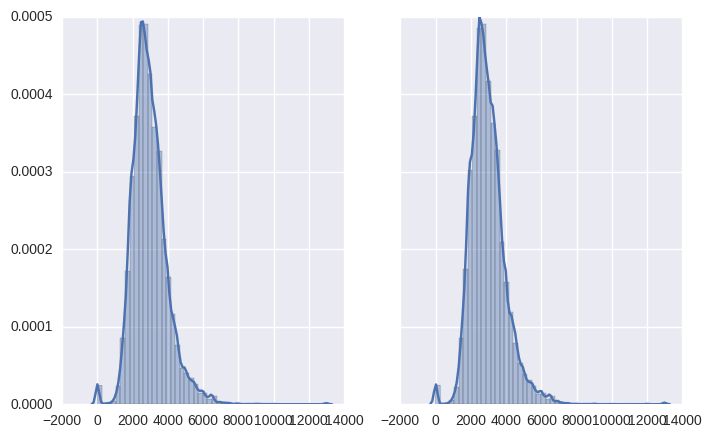

In [4]:
# price per bathroom

inx_train = train['bathrooms'] == 0
inx_test = test['bathrooms'] == 0

non0_inx_train = ~inx_train
non0_inx_test = ~inx_test
train.loc[non0_inx_train,'sc_ba_price'] = train.loc[non0_inx_train,'sc_price']/train.loc[non0_inx_train,'bathrooms']
test.loc[non0_inx_test,'sc_ba_price'] = test.loc[non0_inx_test,'sc_price']/test.loc[non0_inx_test,'bathrooms']

train.loc[inx_train,'sc_ba_price'] = 0
test.loc[inx_test,'sc_ba_price'] = 0


# scaler = preprocessing.StandardScaler()
# scaler.fit(pd.concat([train['sc_ba_price'],test['sc_ba_price']]).values.reshape(-1,1))
# train.loc[:,'sc_ba_price'] = scaler.transform(train['sc_ba_price'].values.reshape(-1, 1))
# test.loc[:,'sc_ba_price'] = scaler.transform(test['sc_ba_price'].values.reshape(-1, 1))



fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([train.loc[:,'sc_ba_price'], test.loc[:,'sc_ba_price']], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)


features_to_use.append('sc_ba_price')
scaler_cols.append('sc_ba_price')
print features_to_use



['sc_price', 'sc_ba_price', 'sc_be_price']


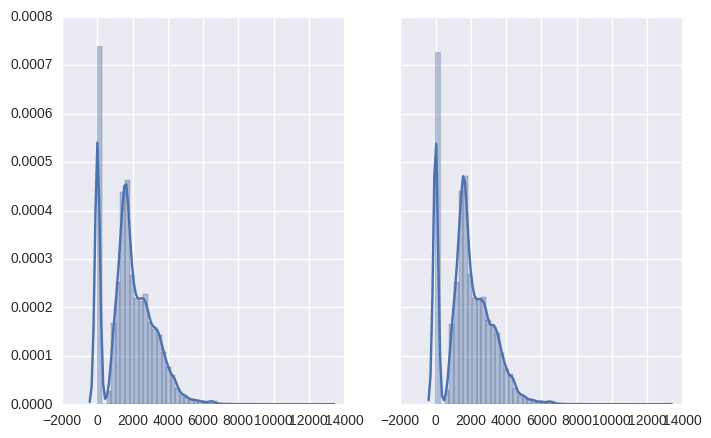

In [5]:
# price per bedrooms

inx_train = train['bedrooms'] == 0
inx_test = test['bedrooms'] == 0

non0_inx_train = ~inx_train
non0_inx_test = ~inx_test
train.loc[non0_inx_train,'sc_be_price'] = train.loc[non0_inx_train,'sc_price']/train.loc[non0_inx_train,'bedrooms']
test.loc[non0_inx_test,'sc_be_price'] = test.loc[non0_inx_test,'sc_price']/test.loc[non0_inx_test,'bedrooms']

train.loc[inx_train,'sc_be_price'] = 0
test.loc[inx_test,'sc_be_price'] = 0


# scaler = preprocessing.StandardScaler()
# scaler.fit(pd.concat([train['sc_be_price'],test['sc_be_price']]).values.reshape(-1,1))
# train.loc[:,'sc_be_price'] = scaler.transform(train['sc_be_price'].values.reshape(-1, 1))
# test.loc[:,'sc_be_price'] = scaler.transform(test['sc_be_price'].values.reshape(-1, 1))



fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([train.loc[:,'sc_be_price'], test.loc[:,'sc_be_price']], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)


features_to_use.append('sc_be_price')
scaler_cols.append('sc_be_price')
print features_to_use



# Rooms

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms']


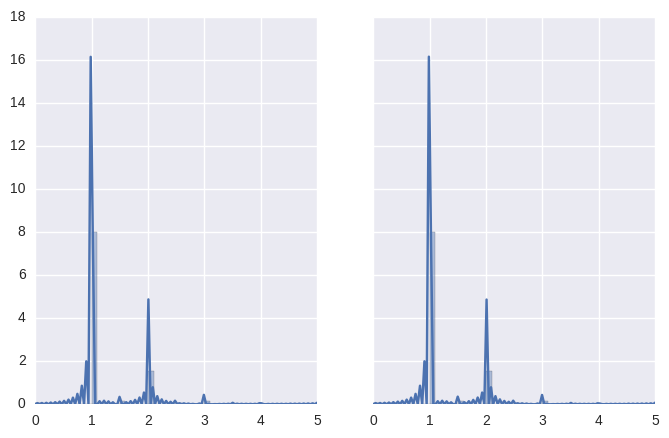

In [6]:
# bathrooms

ulimit = 5

train['sc_bathrooms']=train['bathrooms']
test['sc_bathrooms']=test['bathrooms']

train.loc[train['sc_bathrooms']>ulimit,['sc_bathrooms']] = ulimit
test.loc[test['sc_bathrooms']>ulimit,['sc_bathrooms']] = ulimit


# scaler = preprocessing.StandardScaler()
# scaler.fit(pd.concat([train['sc_bathrooms'],test['sc_bathrooms']]).values.reshape(-1,1))
# train.loc[:,'sc_bathrooms'] = scaler.transform(train['sc_bathrooms'].values.reshape(-1, 1))
# test.loc[:,'sc_bathrooms'] = scaler.transform(test['sc_bathrooms'].values.reshape(-1, 1))

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([train.loc[:,'sc_bathrooms'], test.loc[:,'sc_bathrooms']], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)
    
features_to_use.append('sc_bathrooms')
scaler_cols.append('sc_bathrooms')
print features_to_use  

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms']


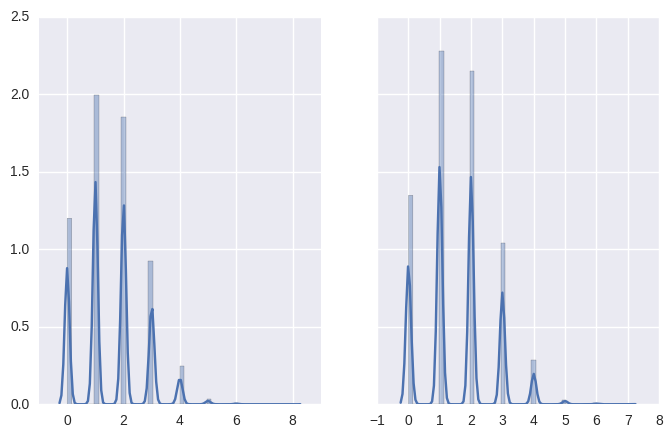

In [7]:
# bedrooms

ulimit = 8

train['sc_bedrooms']=train['bedrooms']
test['sc_bedrooms']=test['bedrooms']

train.loc[train['sc_bedrooms']>ulimit, ['sc_bedrooms']] = ulimit
test.loc[test['sc_bedrooms']>ulimit,['sc_bedrooms']] = ulimit


# scaler = preprocessing.StandardScaler()
# scaler.fit(pd.concat([train['sc_bedrooms'],test['sc_bedrooms']]).values.reshape(-1,1))
# train.loc[:,'sc_bedrooms'] = scaler.transform(train['sc_bedrooms'].values.reshape(-1, 1))
# test.loc[:,'sc_bedrooms'] = scaler.transform(test['sc_bedrooms'].values.reshape(-1, 1))

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([train.loc[:,'sc_bedrooms'], test.loc[:,'sc_bedrooms']], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)
    
features_to_use.append('sc_bedrooms')
scaler_cols.append('sc_bedrooms')
print features_to_use  

# Longitude & Latitude

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude']


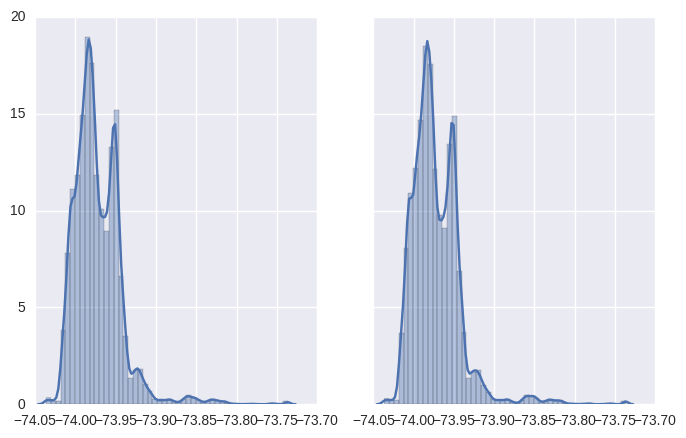

In [8]:
# longitude

tmp = pd.concat([train['longitude'],test['longitude']])
llimit = np.percentile(tmp.values, 0.1)
ulimit = np.percentile(tmp.values, 99.9)

train['sc_longitude']=train['longitude']
test['sc_longitude']=test['longitude']

train.loc[train['sc_longitude']>ulimit, ['sc_longitude']] = ulimit
test.loc[test['sc_longitude']>ulimit, ['sc_longitude']] = ulimit
train.loc[train['sc_longitude']<llimit,['sc_longitude']] = llimit
test.loc[test['sc_longitude']<llimit, ['sc_longitude']] = llimit


# scaler = preprocessing.StandardScaler()
# scaler.fit(tmp)
# train.loc[:,'sc_longitude'] = scaler.transform(train['sc_longitude'].values.reshape(-1, 1))
# test.loc[:,'sc_longitude'] = scaler.transform(test['sc_longitude'].values.reshape(-1, 1))

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([train.loc[:,'sc_longitude'], test.loc[:,'sc_longitude']], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)
    
features_to_use.append('sc_longitude')
scaler_cols.append('sc_longitude')
print features_to_use     

# scaler_cols = ['sc_price','sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude']

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude']


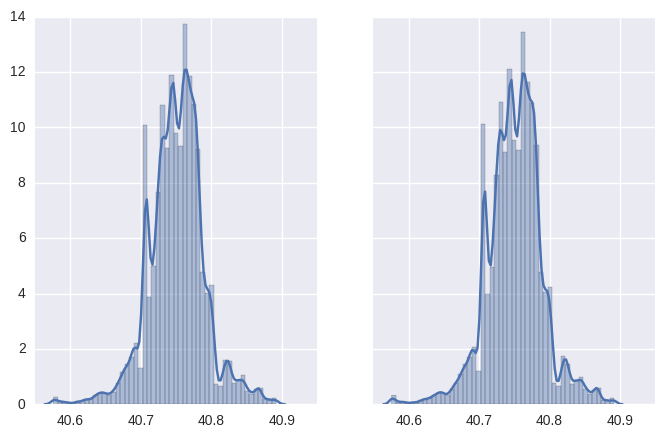

In [9]:
# latitude

tmp = pd.concat([train['latitude'],test['latitude']])
llimit = np.percentile(tmp.values, 0.1)
ulimit = np.percentile(tmp.values, 99.9)

train['sc_latitude']=train['latitude']
test['sc_latitude']=test['latitude']

train.loc[train['sc_latitude']>ulimit, ['sc_latitude']] = ulimit
test.loc[test['sc_latitude']>ulimit, ['sc_latitude']] = ulimit
train.loc[train['sc_latitude']<llimit, ['sc_latitude']] = llimit
test.loc[test['sc_latitude']<llimit, ['sc_latitude']] = llimit


# scaler = preprocessing.StandardScaler()
# scaler.fit(tmp)
# train.loc[:,'sc_latitude'] = scaler.transform(train['sc_latitude'].values.reshape(-1, 1))
# test.loc[:,'sc_latitude'] = scaler.transform(test['sc_latitude'].values.reshape(-1, 1))

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([train.loc[:,'sc_latitude'], test.loc[:,'sc_latitude']], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)
    
features_to_use.append('sc_latitude')
scaler_cols.append('sc_latitude')
print features_to_use   

# Categoricals

In [10]:
lbl = preprocessing.LabelEncoder()
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        if train[f].dtype=='object':
            lbl.fit(list(train[f].values) + list(test[f].values))
            train[f+'_lbl'] = lbl.transform(list(train[f].values))
            test[f+'_lbl'] = lbl.transform(list(test[f].values))
            features_to_use.append(f+'_lbl')
            
print features_to_use

cal_clos = ['display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl']

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl']


# Date

In [11]:
train["created"] = pd.to_datetime(train["created"])
test["created"] = pd.to_datetime(test["created"])

train["created_month"] = train["created"].dt.month
test["created_month"] = test["created"].dt.month

train['created_weekday'] = train["created"].dt.weekday
test['created_weekday'] = test["created"].dt.weekday

train["created_day"] = train["created"].dt.day
test["created_day"] = test["created"].dt.day

train['created_hour'] = train["created"].dt.hour
test['created_hour'] = test["created"].dt.hour



features_to_use.extend(["created_month",'created_weekday',"created_day",'created_hour'])
scaler_cols.extend(["created_month",'created_weekday',"created_day",'created_hour'])
print features_to_use

# scaler_cols = ['sc_price','sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude',
#               "created_month",'created_weekday',"created_day",'created_hour']

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour']


# Description & Feature

In [12]:
# count of words present in description column #
train['clean_description'] = train['description'].apply(lambda x: x.replace('<p><a  website_redacted ', ''))
train['clean_description'] = train['clean_description'].apply(lambda x: x.replace('!<br /><br />', ''))
train['clean_description'] = train['clean_description'].apply(lambda x: x.replace('<br/><br/>', ''))
train['clean_description'] = train['clean_description'].apply(lambda x: x.replace('&amp;', ''))

test['clean_description'] = test['description'].apply(lambda x: x.replace('<p><a  website_redacted ', ''))
test['clean_description'] = test['clean_description'].apply(lambda x: x.replace('!<br /><br />', ''))
test['clean_description'] = test['clean_description'].apply(lambda x: x.replace('<br/><br/>', ''))
test['clean_description'] = test['clean_description'].apply(lambda x: x.replace('&amp;', ''))


string.punctuation.__add__('!!')
string.punctuation.__add__('(')
string.punctuation.__add__(')')

remove_punct_map = dict.fromkeys(map(ord, string.punctuation))

train['clean_description'] = train['clean_description'].apply(lambda x: x.translate(remove_punct_map))
test['clean_description'] = test['clean_description'].apply(lambda x: x.translate(remove_punct_map))



train['num_description_letter'] = train['clean_description'].apply(lambda x: len(x.strip()))
train['num_description_words'] = train['clean_description'].apply(lambda x: 0 if len(x.strip()) == 0 else len(x.split(' ')))
test['num_description_letter'] = test['clean_description'].apply(lambda x: len(x.strip()))
test['num_description_words'] = test['clean_description'].apply(lambda x: 0 if len(x.strip()) == 0 else len(x.split(' ')))


features_to_use.extend(["num_description_words", 'num_description_letter'])
scaler_cols.extend(["num_description_words", 'num_description_letter'])
print features_to_use
# scaler_cols = ['sc_price','sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude',
#               "created_month",'created_weekday',"created_day",'created_hour',"num_description_words", 
#                'num_description_letter']

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour', 'num_description_words', 'num_description_letter']


In [13]:
# https://www.kaggle.com/shwetak91/two-sigma-connect-rental-listing-inquiries/text-classification-description-nouns-and-adj


stop = stopwords.words('english')
def cleaning_text(sentence):
   sentence=sentence.lower()
   sentence=re.sub('[^\w\s]',' ', sentence) #removes punctuations
   sentence=re.sub('\d+',' ', sentence) #removes digits
   cleaned=' '.join([w for w in sentence.split() if not w in stop]) # removes english stopwords
   cleaned=' '.join([w for w , pos in pos_tag(cleaned.split()) if (pos == 'NN' or pos=='JJ' or pos=='JJR' or pos=='JJS' )])
   #selecting only nouns and adjectives
   cleaned=' '.join([w for w in cleaned.split() if not len(w)<=2 ]) #removes single lettered words and digits
   cleaned=cleaned.strip()
   return cleaned


train['clean_description'] = train['clean_description'].apply(lambda x: cleaning_text(x))
test['clean_description'] = test['clean_description'].apply(lambda x: cleaning_text(x))


num = 200

c_vect = CountVectorizer(stop_words='english', max_features=num)
c_vect.fit(pd.concat([train['clean_description'],test['clean_description']]))

tr_desc_sparse = c_vect.transform(train["clean_description"])
te_desc_sparse = c_vect.transform(test["clean_description"])
desc_sparse_cols = c_vect.get_feature_names()

In [14]:
# count of "features" #
train["num_features"] = train["features"].apply(len)
test["num_features"] = test["features"].apply(len)

features_to_use.append("num_features")
scaler_cols.append("num_features")
print features_to_use

# scaler_cols = ['sc_price','sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude',
#               "created_month",'created_weekday',"created_day",'created_hour',"num_description_words", 
#                'num_description_letter',"num_features"]

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour', 'num_description_words', 'num_description_letter', 'num_features']


In [16]:
train['clean_features'] = train["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x])).apply(lambda x: x.lower())
test['clean_features'] = test["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x])).apply(lambda x: x.lower())


c_vect = CountVectorizer(stop_words='english', max_features=num)
c_vect.fit(pd.concat([train['clean_features'],test['clean_features']]))

tr_feat_sparse = c_vect.transform(train["clean_features"])
te_feat_sparse = c_vect.transform(test["clean_features"])
feat_sparse_cols = c_vect.get_feature_names()

# Address

In [17]:
train['address1'] = train['display_address']
train['address1'] = train['address1'].apply(lambda x: x.lower())

test['address1'] = test['display_address']
test['address1'] = test['address1'].apply(lambda x: x.lower())

address_map = {
    'w': 'west',
    'st.': 'street',
    'ave': 'avenue',
    'st': 'street',
    'e': 'east',
    'n': 'north',
    's': 'south'
}


def address_map_func(s):
    s = s.split(' ')
    out = []
    for x in s:
        if x in address_map:
            out.append(address_map[x])
        else:
            out.append(x)
    return ' '.join(out)


train['address1'] = train['address1'].apply(lambda x: x.translate(remove_punct_map))
test['address1'] = test['address1'].apply(lambda x: address_map_func(x))

new_cols = ['street', 'avenue', 'east', 'west', 'north', 'south']

for col in new_cols:
    train[col] = train['address1'].apply(lambda x: 1 if col in x else 0)
    test[col] = test['address1'].apply(lambda x: 1 if col in x else 0)

train['other_address'] = train[new_cols].apply(lambda x: 1 if x.sum() == 0 else 0, axis=1)
test['other_address'] = test[new_cols].apply(lambda x: 1 if x.sum() == 0 else 0, axis=1)



features_to_use.extend(['street', 'avenue', 'east', 'west', 'north', 'south','other_address'])
print features_to_use

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour', 'num_description_words', 'num_description_letter', 'num_features', 'street', 'avenue', 'east', 'west', 'north', 'south', 'other_address']


# Photo

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour', 'num_description_words', 'num_description_letter', 'num_features', 'street', 'avenue', 'east', 'west', 'north', 'south', 'other_address', 'num_photos']


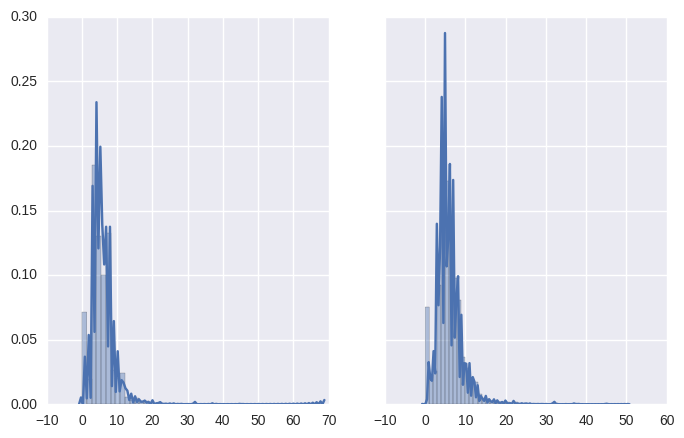

In [18]:
# count of photos #
train["num_photos"] = train["photos"].apply(len).values.reshape(-1,1)
test["num_photos"] = test["photos"].apply(len).values.reshape(-1,1)



# scaler = preprocessing.StandardScaler()
# scaler.fit(pd.concat([train['num_photos'],test['num_photos']]))
# train.loc[:,'num_photos'] = scaler.transform(train['num_photos'].values.reshape(-1, 1))
# test.loc[:,'num_photos'] = scaler.transform(test['num_photos'].values.reshape(-1, 1))

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([train.loc[:,'num_photos'], test.loc[:,'num_photos']], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)
    

features_to_use.append("num_photos")
scaler_cols.append("num_photos")
print features_to_use

# scaler_cols = ['sc_price','sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude',
#               "created_month",'created_weekday',"created_day",'created_hour',"num_description_words", 
#                'num_description_letter',"num_features","num_photos"]

# Manager_id

In [19]:
temp = pd.concat([train.manager_id_lbl,pd.get_dummies(train['interest_level'])], axis = 1).groupby('manager_id_lbl').mean()
temp.columns = ['high_frac','low_frac', 'medium_frac']
temp['count'] = train.groupby('manager_id_lbl').count().iloc[:,1]

# compute skill
temp['manager_skill'] = temp['high_frac']*2 + temp['medium_frac']

# get ixes for unranked managers...
unranked_managers_ixes = temp['count']<20
# ... and ranked ones
ranked_managers_ixes = ~unranked_managers_ixes

# compute mean values from ranked managers and assign them to unranked ones
mean_values = temp.loc[~unranked_managers_ixes, ['high_frac','low_frac', 'medium_frac','manager_skill']].mean()
# print(mean_values)
mean_count = np.mean(temp.loc[unranked_managers_ixes,'count'])
temp.loc[unranked_managers_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
# print(temp.tail(10))

# inner join to assign manager features to the managers in the training dataframe
train = train.merge(temp.reset_index(),how='left', left_on='manager_id_lbl', right_on='manager_id_lbl')

# inner join to assign manager features to the managers in the testing dataframe
test = test.merge(temp.reset_index(),how='left', left_on='manager_id_lbl', right_on='manager_id_lbl')
index = test['manager_skill'].index[test['manager_skill'].apply(np.isnan)]
test.loc[index,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
test.loc[index,'count'] = int(mean_count)

features_to_use.extend(['high_frac','low_frac', 'medium_frac','manager_skill','count'])
scaler_cols.extend(['high_frac','low_frac', 'medium_frac','manager_skill','count'])
print features_to_use

# scaler_cols = ['sc_price','sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude',
#               "created_month",'created_weekday',"created_day",'created_hour',"num_description_words", 
#                'num_description_letter',"num_features","num_photos",'high_frac','low_frac', 'medium_frac',
#                'manager_skill','count']

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour', 'num_description_words', 'num_description_letter', 'num_features', 'street', 'avenue', 'east', 'west', 'north', 'south', 'other_address', 'num_photos', 'high_frac', 'low_frac', 'medium_frac', 'manager_skill', 'count']


In [21]:
tmp = pd.concat([train['manager_id_lbl'],test['manager_id_lbl']])
managers_count = tmp.value_counts()

train['top_10_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 90)] else 0)
train['top_25_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 75)] else 0)
train['top_5_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 95)] else 0)
train['top_50_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 50)] else 0)
train['top_1_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 99)] else 0)
train['top_2_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 98)] else 0)
train['top_15_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 85)] else 0)
train['top_20_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 80)] else 0)
train['top_30_manager'] = train['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 70)] else 0)

test['top_10_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 90)] else 0)
test['top_25_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 75)] else 0)
test['top_5_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 95)] else 0)
test['top_50_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 50)] else 0)
test['top_1_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 99)] else 0)
test['top_2_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 98)] else 0)
test['top_15_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 85)] else 0)
test['top_20_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 80)] else 0)
test['top_30_manager'] = test['manager_id_lbl'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 70)] else 0)


features_to_use.extend(['top_10_manager','top_25_manager','top_5_manager','top_50_manager','top_1_manager',
                       'top_2_manager','top_15_manager','top_20_manager','top_30_manager'])
print features_to_use

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour', 'num_description_words', 'num_description_letter', 'num_features', 'street', 'avenue', 'east', 'west', 'north', 'south', 'other_address', 'num_photos', 'high_frac', 'low_frac', 'medium_frac', 'manager_skill', 'count', 'top_10_manager', 'top_25_manager', 'top_5_manager', 'top_50_manager', 'top_1_manager', 'top_2_manager', 'top_15_manager', 'top_20_manager', 'top_30_manager']


# Building_id

In [22]:
train['Zero_building_id'] = train['building_id'].apply(lambda x: 1 if x == '0' else 0)
test['Zero_building_id'] = test['building_id'].apply(lambda x: 1 if x == '0' else 0)
features_to_use.append('Zero_building_id')

In [23]:
tmp = pd.concat([train['building_id_lbl'],test['building_id_lbl']])
buildings_count = tmp.value_counts()

train['top_10_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 90)] else 0)
train['top_25_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 75)] else 0)
train['top_5_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 95)] else 0)
train['top_50_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 50)] else 0)
train['top_1_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 99)] else 0)
train['top_2_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 98)] else 0)
train['top_15_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 85)] else 0)
train['top_20_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 80)] else 0)
train['top_30_building'] = train['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 70)] else 0)

test['top_10_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 90)] else 0)
test['top_25_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 75)] else 0)
test['top_5_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 95)] else 0)
test['top_50_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 50)] else 0)
test['top_1_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 99)] else 0)
test['top_2_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 98)] else 0)
test['top_15_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 85)] else 0)
test['top_20_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 80)] else 0)
test['top_30_building'] = test['building_id_lbl'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 70)] else 0)


features_to_use.extend(['top_10_building','top_25_building','top_5_building','top_50_building','top_1_building',
                       'top_2_building','top_15_building','top_20_building','top_30_building'])
print features_to_use

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour', 'num_description_words', 'num_description_letter', 'num_features', 'street', 'avenue', 'east', 'west', 'north', 'south', 'other_address', 'num_photos', 'high_frac', 'low_frac', 'medium_frac', 'manager_skill', 'count', 'top_10_manager', 'top_25_manager', 'top_5_manager', 'top_50_manager', 'top_1_manager', 'top_2_manager', 'top_15_manager', 'top_20_manager', 'top_30_manager', 'Zero_building_id', 'top_10_building', 'top_25_building', 'top_5_building', 'top_50_building', 'top_1_building', 'top_2_building', 'top_15_building', 'top_20_building', 'top_30_building']


# Distance

In [189]:
# train = pd.read_pickle('../input/Data0220/' + 'train_2017-02-20-18-56.pkl')
# test = pd.read_pickle('../input/Data0220/' + 'test_2017-02-20-18-56.pkl')

# feautres_to_use = pd.read_pickle('../input/Data0220/' + 'featurestouse_2017-02-20-18-56.pkl')

# train_y = pd.read_pickle('../input/Data0220/' + 'y_2017-02-20-18-56.pkl') 

# print train.shape, test.shape

(49352, 68) (74659, 67)


In [24]:
from sklearn.metrics.pairwise import euclidean_distances

index_low = train[train['interest_level'] == 'low'].index
index_medium = train[train['interest_level'] == 'medium'].index
index_high = train[train['interest_level'] == 'high'].index

dis_low = ['dis_low_1','dis_low_2','dis_low_4','dis_low_8',
           'dis_low_16','dis_low_32','dis_low_64','dis_low_128']
for i in range(len(dis_low)):
    train[dis_low[i]] = np.nan
    test[dis_low[i]] = np.nan
    
dis_medium = ['dis_medium_1','dis_medium_2','dis_medium_4','dis_medium_8',
              'dis_medium_16','dis_medium_32','dis_medium_64','dis_medium_128']
for i in range(len(dis_low)):
    train[dis_medium[i]] = np.nan
    test[dis_medium[i]] = np.nan
    
dis_high = ['dis_high_1','dis_high_2','dis_high_4','dis_high_8',
            'dis_high_16','dis_high_32','dis_high_64','dis_high_128']
for i in range(len(dis_low)):
    train[dis_high[i]] = np.nan
    test[dis_high[i]] = np.nan

euc_low = train.loc[index_low,['sc_latitude','sc_longitude']]*100
euc_medium = train.loc[index_medium,['sc_latitude','sc_longitude']]*100
euc_high = train.loc[index_high,['sc_latitude','sc_longitude']]*100

temp_train = train.loc[:,['sc_latitude','sc_longitude']]*100
temp_test = test.loc[:,['sc_latitude','sc_longitude']]*100

In [63]:
ntrain = train.shape[0] - 1

for i in range(0, ntrain, 2000):
    if (i + 2000) > ntrain:
        n = ntrain
    else:
        n = i + 2000 - 1
    print (i, n)
    # dist to low
    tmp_dist = euclidean_distances(temp_train.loc[i:n,:],euc_low)
    tmp_dist = pd.DataFrame(np.sort(tmp_dist,axis = 1))
    for dis_n in range(len(dis_low)):
        train.loc[i:n,dis_low[dis_n]] = np.array(tmp_dist.loc[:,:np.power(2,dis_n)-1].sum(axis = 1))
        


    # dist to medium
    tmp_dist = euclidean_distances(temp_train.loc[i:n,:],euc_medium)
    tmp_dist = pd.DataFrame(np.sort(tmp_dist,axis = 1))
    for dis_n in range(len(dis_medium)):
        train.loc[i:n,dis_medium[dis_n]] = np.array(tmp_dist.loc[:,:np.power(2,dis_n)-1].sum(axis = 1))
         
    
    # dist to high
    tmp_dist = euclidean_distances(temp_train.loc[i:n,:],euc_high)
    tmp_dist = pd.DataFrame(np.sort(tmp_dist,axis = 1))
    for dis_n in range(len(dis_high)):
        train.loc[i:n,dis_high[dis_n]] = np.array(tmp_dist.loc[:,:np.power(2,dis_n)-1].sum(axis = 1))

             

print 'trian shape: ',train.shape

(49349, 49351)
trian shape:  (49352, 91)


In [66]:
ntest = test.shape[0] - 1

for i in range(0, ntest, 2000):
    if (i + 2000) > ntest:
        n = ntest
    else:
        n = i + 2000 - 1
    print (i, n)
    # dist to low
    tmp_dist = euclidean_distances(temp_test.loc[i:n,:],euc_low)
    tmp_dist = pd.DataFrame(np.sort(tmp_dist,axis = 1))   
    for dis_n in range(len(dis_low)):
        test.loc[i:n,dis_low[dis_n]] = np.array(tmp_dist.loc[:,:np.power(2,dis_n)-1].sum(axis = 1))

    # dist to medium    
    tmp_dist = euclidean_distances(temp_test.loc[i:n,:],euc_medium)
    tmp_dist = pd.DataFrame(np.sort(tmp_dist,axis = 1))
    for dis_n in range(len(dis_medium)):
        test.loc[i:n,dis_medium[dis_n]] = np.array(tmp_dist.loc[:,:np.power(2,dis_n)-1].sum(axis = 1))

    # dist to high
    tmp_dist = euclidean_distances(temp_test.loc[i:n,:],euc_high)
    tmp_dist = pd.DataFrame(np.sort(tmp_dist,axis = 1))
    for dis_n in range(len(dis_high)):
        test.loc[i:n,dis_high[dis_n]] = np.array(tmp_dist.loc[:,:np.power(2,dis_n)-1].sum(axis = 1))

print 'test shape: ',test.shape  

(0, 1999)
(2000, 3999)
(4000, 5999)
(6000, 7999)
(8000, 9999)
(10000, 11999)
(12000, 13999)
(14000, 15999)
(16000, 17999)
(18000, 19999)
(20000, 21999)
(22000, 23999)
(24000, 25999)
(26000, 27999)
(28000, 29999)
(30000, 31999)
(32000, 33999)
(34000, 35999)
(36000, 37999)
(38000, 39999)
(40000, 41999)
(42000, 43999)
(44000, 45999)
(46000, 47999)
(48000, 49999)
(50000, 51999)
(52000, 53999)
(54000, 55999)
(56000, 57999)
(58000, 59999)
(60000, 61999)
(62000, 63999)
(64000, 65999)
(66000, 67999)
(68000, 69999)
(70000, 71999)
(72000, 73999)
(74000, 74658)
test shape:  (74659, 90)


In [68]:

features_to_use.extend(dis_low)
features_to_use.extend(dis_medium)
features_to_use.extend(dis_high)
print features_to_use

['sc_price', 'sc_ba_price', 'sc_be_price', 'sc_bathrooms', 'sc_bedrooms', 'sc_longitude', 'sc_latitude', 'display_address_lbl', 'manager_id_lbl', 'building_id_lbl', 'street_address_lbl', 'created_month', 'created_weekday', 'created_day', 'created_hour', 'num_description_words', 'num_description_letter', 'num_features', 'street', 'avenue', 'east', 'west', 'north', 'south', 'other_address', 'num_photos', 'high_frac', 'low_frac', 'medium_frac', 'manager_skill', 'count', 'top_10_manager', 'top_25_manager', 'top_5_manager', 'top_50_manager', 'top_1_manager', 'top_2_manager', 'top_15_manager', 'top_20_manager', 'top_30_manager', 'Zero_building_id', 'top_10_building', 'top_25_building', 'top_5_building', 'top_50_building', 'top_1_building', 'top_2_building', 'top_15_building', 'top_20_building', 'top_30_building', 'dis_low_1', 'dis_low_2', 'dis_low_4', 'dis_low_8', 'dis_low_16', 'dis_low_32', 'dis_low_64', 'dis_low_128', 'dis_medium_1', 'dis_medium_2', 'dis_medium_4', 'dis_medium_8', 'dis_med

In [69]:
scaler_cols.extend(dis_low)
scaler_cols.extend(dis_medium)
scaler_cols.extend(dis_high)
scaler_cols

['sc_price',
 'sc_ba_price',
 'sc_be_price',
 'sc_bathrooms',
 'sc_bedrooms',
 'sc_longitude',
 'sc_latitude',
 'created_month',
 'created_weekday',
 'created_day',
 'created_hour',
 'num_description_words',
 'num_description_letter',
 'num_features',
 'num_photos',
 'high_frac',
 'low_frac',
 'medium_frac',
 'manager_skill',
 'count',
 'dis_low_1',
 'dis_low_2',
 'dis_low_4',
 'dis_low_8',
 'dis_low_16',
 'dis_low_32',
 'dis_low_64',
 'dis_low_128',
 'dis_medium_1',
 'dis_medium_2',
 'dis_medium_4',
 'dis_medium_8',
 'dis_medium_16',
 'dis_medium_32',
 'dis_medium_64',
 'dis_medium_128',
 'dis_high_1',
 'dis_high_2',
 'dis_high_4',
 'dis_high_8',
 'dis_high_16',
 'dis_high_32',
 'dis_high_64',
 'dis_high_128']

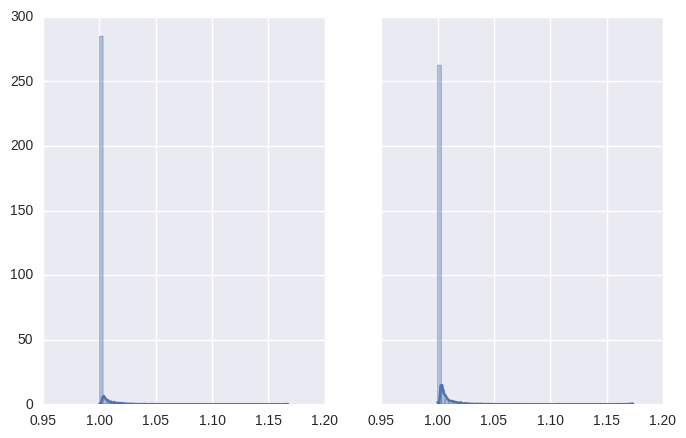

In [111]:
# longitude
tmp_col = 'dis_low_1'
tmp = pd.concat([train[tmp_col],test[tmp_col]])
# llimit = np.percentile(tmp.values, 1)
ulimit = np.percentile(tmp, 99)

# train['sc_longitude']=train['longitude']
# test['sc_longitude']=test['longitude']
tmp_train=np.power(train[tmp_col]+1,0.1)
tmp_test=np.power(test[tmp_col]+1,0.1)

# train['sc_longitude'].ix[train['sc_longitude']>ulimit] = ulimit
# test['sc_longitude'].ix[test['sc_longitude']>ulimit] = ulimit
# train['sc_longitude'].ix[train['sc_longitude']<llimit] = llimit
# test['sc_longitude'].ix[test['sc_longitude']<llimit] = llimit

# tmp_train.ix[tmp_train>ulimit] = ulimit
# tmp_test.ix[tmp_test>ulimit] = ulimit



# scaler = preprocessing.StandardScaler()
# scaler.fit(tmp)
# train.loc[:,'sc_longitude'] = scaler.transform(train['sc_longitude'].values.reshape(-1, 1))
# test.loc[:,'sc_longitude'] = scaler.transform(test['sc_longitude'].values.reshape(-1, 1))


fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(8,5)
for data, ax in zip([tmp_train, tmp_test], [ax1,ax2]):
    sns.distplot(data.values, bins = 50, kde = True, ax=ax)



# features_to_use.append('sc_longitude')
# print features_to_use     

# Feature

In [100]:
features_to_use

['sc_price',
 'sc_ba_price',
 'sc_be_price',
 'sc_bathrooms',
 'sc_bedrooms',
 'sc_longitude',
 'sc_latitude',
 'display_address_lbl',
 'manager_id_lbl',
 'building_id_lbl',
 'street_address_lbl',
 'created_month',
 'created_weekday',
 'created_day',
 'created_hour',
 'num_description_words',
 'num_description_letter',
 'num_features',
 'street',
 'avenue',
 'east',
 'west',
 'north',
 'south',
 'other_address',
 'num_photos',
 'high_frac',
 'low_frac',
 'medium_frac',
 'manager_skill',
 'count',
 'top_10_manager',
 'top_25_manager',
 'top_5_manager',
 'top_50_manager',
 'top_1_manager',
 'top_2_manager',
 'top_15_manager',
 'top_20_manager',
 'top_30_manager',
 'Zero_building_id',
 'top_10_building',
 'top_25_building',
 'top_5_building',
 'top_50_building',
 'top_1_building',
 'top_2_building',
 'top_15_building',
 'top_20_building',
 'top_30_building',
 'dis_low_1',
 'dis_low_2',
 'dis_low_4',
 'dis_low_8',
 'dis_low_16',
 'dis_low_32',
 'dis_low_64',
 'dis_low_128',
 'dis_medium_1'

In [101]:
len(features_to_use)

74

In [32]:
# train_X = sparse.hstack([train[features_to_use], tr_desc_sparse, tr_feat_sparse]).tocsr()
# test_X = sparse.hstack([test[features_to_use], te_desc_sparse, te_feat_sparse]).tocsr()

In [103]:
now = datetime.now()

name_feautres = '../input/featurestouse_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_scaler_cols = '../input/scaler_cols_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_cal_clos = '../input/cal_clos_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_y = '../input/y_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_tr_desc_sparse = '../input/tr_desc_sparse_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_tr_feat_sparse = '../input/tr_feat_sparse_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_te_desc_sparse = '../input/te_desc_sparse_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_te_feat_sparse = '../input/te_feat_sparse_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_train = '../input/train_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_test = '../input/test_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_desc_sparse_cols = '../input/desc_sparse_cols_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'
name_feat_sparse_cols = '../input/feat_sparse_cols_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.pkl'


pd.to_pickle(features_to_use,name_feautres)
pd.to_pickle(scaler_cols, name_scaler_cols)
pd.to_pickle(cal_clos, name_cal_clos)
pd.to_pickle(target, name_y)
# pd.to_pickle(tr_desc_sparse, name_tr_desc_sparse)
# pd.to_pickle(tr_feat_sparse, name_tr_feat_sparse)
# pd.to_pickle(te_desc_sparse, name_te_desc_sparse)
# pd.to_pickle(te_feat_sparse, name_te_feat_sparse)
pd.to_pickle(train, name_train)
pd.to_pickle(test, name_test)




# pd.to_pickle(desc_sparse_cols,name_desc_sparse_cols)
# pd.to_pickle(feat_sparse_cols,name_feat_sparse_cols)

In [102]:
now

datetime.datetime(2017, 2, 20, 23, 23, 17, 153989)

In [112]:
train.shape

(49352, 91)

In [113]:
test.shape

(74659, 90)